<a href="https://colab.research.google.com/github/varsha217/varsha217/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import all galleries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
# for real time monitoring simulation
import time

LOAD AND EXPLORE DATASET

In [ ]:
df=pd.read_csv('//content/Data Anaytics Project Data  - Project 2- Data .csv')

displya the few rows apf dataset

In [ ]:
print(df.head())

   Transaction_ID  Customer_ID  Transaction_Amount   Location Time_of_Day  \
0               1          101                1000     Mumbai     Morning   
1               2          102                 500      Delhi   Afternoon   
2               3          103                2000    Chennai     Evening   
3               4          104                 300    Gujarat     Morning   
4               5          105                 800  Bengalore   Afternoon   

   Is_Fraudulent  
0              0  
1              1  
2              0  
3              1  
4              0  


In [ ]:
# check for missing values
print(df.isnull().sum)

<bound method DataFrame.sum of     Transaction_ID  Customer_ID  Transaction_Amount  Location  Time_of_Day  \
0            False        False               False     False        False   
1            False        False               False     False        False   
2            False        False               False     False        False   
3            False        False               False     False        False   
4            False        False               False     False        False   
5            False        False               False     False        False   
6            False        False               False     False        False   
7            False        False               False     False        False   
8            False        False               False     False        False   
9            False        False               False     False        False   
10           False        False               False     False        False   
11           False        False  

In [ ]:
# check the basic stastics of data
print(df.describe())

       Transaction_ID  Customer_ID  Transaction_Amount  Is_Fraudulent
count        20.00000     20.00000           20.000000      20.000000
mean         10.50000    110.50000         1192.500000       0.400000
std           5.91608      5.91608          787.112478       0.502625
min           1.00000    101.00000          300.000000       0.000000
25%           5.75000    105.75000          500.000000       0.000000
50%          10.50000    110.50000          950.000000       0.000000
75%          15.25000    115.25000         1725.000000       1.000000
max          20.00000    120.00000         3000.000000       1.000000


DATA PREPRCESSING
* HANDLE MISSING VALUES AND PREPROCESS DATA

In [ ]:
#drop the missing values or fill the missing values
df_cleaned = df.dropna()

#conver catogerical columns to numerical
df_cleaned= pd.get_dummies(df_cleaned, drop_first=True)

# check cleaned data
print(df_cleaned.head())

   Transaction_ID  Customer_ID  Transaction_Amount  Is_Fraudulent  \
0               1          101                1000              0   
1               2          102                 500              1   
2               3          103                2000              0   
3               4          104                 300              1   
4               5          105                 800              0   

   Location_Chennai  Location_Delhi  Location_Gujarat  Location_Mumbai  \
0             False           False             False             True   
1             False            True             False            False   
2              True           False             False            False   
3             False           False              True            False   
4             False           False             False            False   

   Time_of_Day_Evening  Time_of_Day_Morning  
0                False                 True  
1                False                False  
2 

FEATURE SELECTION

*SLECT FEATURE THAT INDICATE FRAUDE

In [ ]:
#SPECIFY RELEVENT FEATURE FOR FRAUD DETECTION
features =['Transaction_Amount', 'Location_Mumbai', 'Location_Delhi',  'Location_Gujarat', 'Location_Chennai', 'Customer_ID','Is_Fraudulent', 'Time_of_Day_Evening' , 'Time_of_Day_Morning'] # Removed duplicate 'Location_Delhi' and corrected 'Location_mumbai' to 'Location_Mumbai'

#extract the features matrix (x)

x = df_cleaned[features]

# normaalize the data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(x)

 MODEL SELCTION

In [ ]:
#IMPORT THE NECESSARY MODULE
from sklearn.ensemble import IsolationForest # Import the IsolationForest class from the sklearn.ensemble module

#INITIALIZE THE ISOLATION FOREST MODEL
model= IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

#FIT THE MODEL TO THE SCALED DATA
model.fit(X_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [ ]:
# predict the anomalies 1=normal, -1=anamolies
df_cleaned['anamoly_score']= model.predict(X_scaled)
# convert predictions  -1 to 1 for fraud and 1-0 for normal
df_cleaned['anamoly_score']=df_cleaned['anamoly_score'].apply(lambda x:1 if x==-1 else 0)
#count the numbers of detected fraud
fraud_count= df_cleaned['anamoly_score'].value_counts()
print(fraud_count)


anamoly_score
0    19
1     1
Name: count, dtype: int64


Evalution

In [ ]:
#Assuming 'label' column exists where 1= fraud, 0= normal (labeled data)

In [ ]:
y_true = df_cleaned['label'] # Use the existing 'label' column to get ground truth values

In [ ]:
#model prediction
y_pred = df_cleaned['anamoly_score']

In [ ]:
print(len(y_true))
print(len(y_pred))

5
20


In [ ]:
# prompt: print(len(X), len(y))

y = df_cleaned['Is_Fraudulent']
X = df_cleaned.drop('Is_Fraudulent', axis=1)
print(len(X), len(y))


20 20


In [ ]:
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Assuming y_true is derived from a dataframe called 'df_cleaned' of length 20
y_true = df_cleaned['Is_Fraudulent']

#confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  1]
 [ 8  0]]


In [ ]:
#confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  1]
 [ 8  0]]


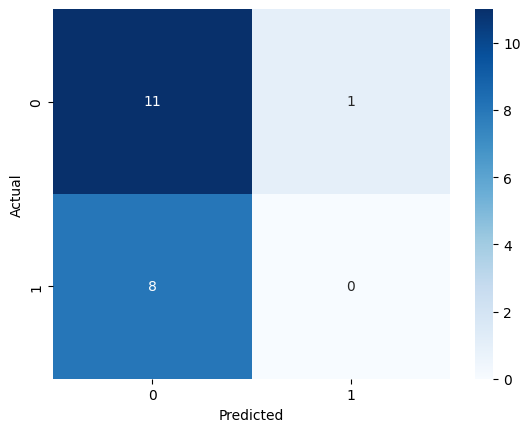

In [ ]:
# visualize the confusion ma
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Simulate real-time transaction monitoring
for i in range(len(df_cleaned)):
    new_transaction = X_scaled[i].reshape(1, -1)
    prediction = model.predict(new_transaction)

    # If an anomaly is detected (fraud)
    if prediction == -1:
        print(f"Fraudulent transaction detected: Transaction ID {i}")
        # Trigger an alert (e.g., email, SMS) or automated action

    time.sleep(1)  # Simulate real-time delay


Fraudulent transaction detected: Transaction ID 13


 Model Fine-tuning and Deployment
Fine-tune the Model: You can adjust parameters such as the contamination rate to fit the bank’s fraud levels better.
Deploy: Integrate the model with real-time transaction systems and trigger alerts for detected fraud cases.
